In [1809]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1810]:
#Read the csv file
df= pd.read_csv("glassdoor_jobs.csv")

In [1811]:
#Print the dataframe and check its head
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


# Let's have a closer look at the dataset 

In [1812]:
df.shape

(956, 15)

In [1813]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [1814]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

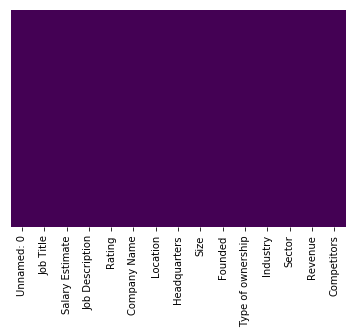

In [1815]:
#Visualize to check if any null values exist in the dataframe
sns.heatmap(df.isnull(), yticklabels= False, cbar= False,cmap= 'viridis')

In [1816]:
#Function to determine the missing values in all columns of the dataframe
def missing_vals(df, columns):
    missing = {}
    
    df_length= len(df)
    
    for column in columns:
        total_col_val = df[column].value_counts().sum()
        missing[column]= df_length- total_col_val
    return missing
print(missing_vals(df, columns = df.columns))

{'Unnamed: 0': 0, 'Job Title': 0, 'Salary Estimate': 0, 'Job Description': 0, 'Rating': 0, 'Company Name': 0, 'Location': 0, 'Headquarters': 0, 'Size': 0, 'Founded': 0, 'Type of ownership': 0, 'Industry': 0, 'Sector': 0, 'Revenue': 0, 'Competitors': 0}


In [1817]:
#Return statistics on numerical columns
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


# Now let's do some data cleaning steps

In [1818]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [1819]:
#Check ranges of salary
df["Salary Estimate"].value_counts()

-1                                  214
$49K-$113K (Glassdoor est.)           6
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
$74K-$124K (Glassdoor est.)           5
$107K-$173K (Glassdoor est.)          5
$76K-$142K (Glassdoor est.)           5
$81K-$167K (Glassdoor est.)           5
$56K-$95K (Glassdoor est.)            4
$40K-$68K (Glassdoor est.)            4
$61K-$109K (Glassdoor est.)           4
$68K-$139K (Glassdoor est.)           4
$82K-$132K (Glassdoor est.)           4
$18-$25 Per Hour(Glassdoor est.)      4
$44K-$78K (Glassdoor est.)            4
$35K-$62K (Glassdoor est.)            4
$42K-$86K (Glassdoor est.)            4
$49K-$97K (Glassdoor est.)            4
$44K-$86K (Glassdoor est.)            4
$110K-$175K (Glassdoor est.)          4
$63K-$105K (Glassdoor est.)           4
$64K-$106K (Glassdoor est.)           4
$56K-$97K (Glassdoor est.)            4
$39K-$66K (Glassdoor est.)            4


In [1820]:
#Drop rows with Salary estimate as -1
indexname= df[df["Salary Estimate"]=='-1'].index
df.drop(indexname, axis=0, inplace=True)

In [1821]:
df.shape

(742, 14)

In [1822]:
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.strip('(Glassdoor est.)'))

In [1823]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,Data Scientist,$71K-$119K,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,Data Scientist,$54K-$93K,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,Data Scientist,$86K-$142K,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,Research Scientist,$38K-$84K,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,Data Scientist,$120K-$160K,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


In [1824]:
#Remove the $ from the salary column
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.replace('$', ""))

In [1825]:
#Remove the K from the salary column
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.replace('K', ""))

In [1826]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


In [1827]:
#finding the bucketized salary values
df['Salary Estimate'].value_counts()

86-143           6
21-34 Per Hou    6
49-113           6
54-115           6
107-173          5
76-142           5
74-124           5
81-167           5
44-86            4
63-105           4
61-109           4
40-68            4
56-97            4
42-86            4
69-127           4
44-78            4
56-95            4
108-171          4
110-175          4
49-97            4
68-139           4
35-62            4
18-25 Per Hou    4
39-66            4
64-106           4
82-132           4
97-160           3
108-173          3
65-134           3
56-99            3
                ..
105-173          1
70-132           1
76-145           1
79-127           1
110-184          1
37-68            1
20-39            1
81-130           1
56-117           1
112-179          1
76-140           1
102-165          1
70-122           1
115-220          1
57-118           1
91-148           1
75-126           1
59-125           1
85-159           1
75-127           1
48-90            1
80-105(Emplo

In [1828]:
#Create a new column for per hour employees
df["Per hour employee"]= df['Salary Estimate'].apply(lambda x: 1 if "per hou" in x.lower() else 0)


In [1829]:
df["Per hour employee"].value_counts()

0    718
1     24
Name: Per hour employee, dtype: int64

In [1830]:
# Creating column for 'Employee Provided Salary'
df['Emp Provided Salary'] = df['Salary Estimate'].apply(lambda x: 1 if "employer provided salary" in x.lower() else 0)

In [1831]:
df['Emp Provided Salary'].value_counts()

0    725
1     17
Name: Emp Provided Salary, dtype: int64

In [1832]:
# Removing 'Per Hour' from'Salary Estimate' column
df['Salary Estimate']= df['Salary Estimate'].apply(lambda x: x.lower().replace('per hou', ""))

In [1833]:
# Removing 'Employer Provided Salary' from'Salary Estimate' column
df['Salary Estimate']= df['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary', ""))

In [1834]:
df['Salary Estimate'].value_counts()
 

49-113     6
86-143     6
54-115     6
21-34      6
107-173    5
74-124     5
81-167     5
76-142     5
63-105     4
44-86      4
56-97      4
69-127     4
44-78      4
61-109     4
108-171    4
40-68      4
35-62      4
42-86      4
18-25      4
64-106     4
110-175    4
82-132     4
49-97      4
68-139     4
56-95      4
39-66      4
32-59      3
61-113     3
60-127     3
80-155     3
          ..
52-99      1
80-134     1
57-118     1
63-120     1
130-208    1
74-122     1
26-55      1
72-142     1
139-220    1
55-98      1
84-136     1
74-119     1
88-148     1
126-228    1
65-120     1
62-114     1
112-179    1
105-173    1
69-119     1
76-140     1
102-165    1
117-231    1
41-95      1
54-92      1
45-82      1
118-228    1
27-47      1
46-85      1
58-108     1
61-100     1
Name: Salary Estimate, Length: 416, dtype: int64

In [1835]:
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.strip(':'))

In [1836]:
#There are still some extra characters in the Salary column
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: x.split('(')[0])


In [1837]:
df['Salary Estimate'].value_counts()

49-113     6
54-115     6
86-143     6
21-34      6
107-173    5
76-142     5
74-124     5
81-167     5
56-95      4
82-132     4
49-97      4
64-106     4
18-25      4
42-86      4
56-97      4
44-86      4
108-171    4
61-109     4
110-175    4
35-62      4
63-105     4
40-68      4
44-78      4
69-127     4
39-66      4
68-139     4
61-119     3
54-71      3
90-179     3
190-220    3
          ..
80-129     1
77-136     1
44-73      1
63-120     1
42-77      1
130-208    1
26-55      1
139-220    1
50-98      1
66-117     1
84-136     1
74-119     1
72-142     1
126-228    1
65-120     1
62-114     1
55-98      1
105-173    1
69-119     1
85-142     1
117-231    1
41-95      1
116-209    1
45-82      1
118-228    1
27-47      1
112-179    1
58-108     1
74-122     1
61-100     1
Name: Salary Estimate, Length: 416, dtype: int64

In [1838]:
#Let's create columns for Min salary, Max salary, average salary
df["Min salary"]= df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df["Max salary"]= df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

In [1839]:
#Converting Min Per hour salary to annual
df['Min salary']=df.apply(lambda x: x['Min salary']*2 if x["Per hour employee"] == 1 
     else x['Min salary'], axis=1)

In [1840]:
#Converting Max Per hour salary to annual
df['Max salary']=df.apply(lambda x: x['Max salary']*2 if x["Per hour employee"] == 1 
     else x['Max salary'], axis=1)

In [1841]:
df['Avg Salary']= (df["Min salary"]+df["Max salary"])/2

In [1842]:
df.head(30)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Per hour employee,Emp Provided Salary,Min salary,Max salary,Avg Salary
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5
5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0
6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93,73.5
7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142,114.0
8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84,61.0
9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160,140.0


In [1843]:
df[df["Per hour employee"]==1][["Per hour employee","Min salary", "Max salary"]]

,Per hour employee,Min salary,Max salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [1844]:
# Cleaning the 'Job Description' column based on the programming languages knowledge 
df["python_job"] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df["r_job"] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df["spark_job"] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df["aws_job"] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df["excel_job"] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [1845]:
df["python_job"].value_counts()

1    392
0    350
Name: python_job, dtype: int64

In [1846]:
# Categorizing the 'Job Title' column into simple categories
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

df['New Job Title'] = df['Job Title'].apply(title_simplifier)

In [1847]:
print(df["New Job Title"].value_counts())
print(df["New Job Title"].value_counts().sum())

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: New Job Title, dtype: int64
742


In [1848]:
#Let's look at column "Location" and categorize column by State
df["Job State"]=df["Location"].apply(lambda x: x.split(",")[1])


In [1849]:
df["Job State"].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' UT', ' TN', ' DE', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

In [1850]:
df["Job State"]= df["Job State"].apply(lambda x: x.replace('Los Angeles', "CA"))

In [1851]:
df["Job State"].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' UT', ' TN', ' DE', ' ID', ' RI', ' IA', ' SC',
       ' KS'], dtype=object)

In [1852]:
#Let's have a look at the rest of the columns and see what changes are still required
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Per hour employee,Emp Provided Salary,Min salary,Max salary,Avg Salary,python_job,r_job,spark_job,aws_job,excel_job,New Job Title,Job State
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,0,0,0,1,data scientist,NM
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,0,0,0,0,data scientist,MD
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,0,1,0,1,data scientist,FL
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,0,0,0,0,data scientist,WA
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,0,0,0,1,data scientist,NY


In [1853]:
df["Founded"].value_counts()

-1       50
 2010    32
 2008    31
 1996    27
 2006    24
 2012    21
 2011    19
 1958    18
 2007    18
 2002    18
 1984    18
 2015    16
 2013    15
 1851    14
 1875    14
 1781    14
 1997    14
 2014    13
 1999    12
 1965    12
 2017    12
 2000    10
 2003    10
 2005    10
 1935    10
 1912    10
 1961     9
 1913     9
 1981     9
 1982     9
         ..
 2019     2
 1980     2
 1974     2
 1962     2
 1975     2
 1954     2
 1952     2
 1951     2
 1983     2
 1928     2
 1945     1
 1744     1
 1812     1
 1850     1
 1979     1
 1860     1
 1927     1
 1942     1
 1878     1
 1883     1
 1887     1
 1889     1
 1899     1
 1902     1
 1930     1
 1985     1
 1914     1
 1929     1
 1971     1
 1917     1
Name: Founded, Length: 102, dtype: int64

In [1854]:
#Let's tackle the column Founded column and check how many years has the company been running
df["Functioning Years"]=df["Founded"].apply(lambda x: x if x < 1 else 2020-x)

In [1855]:
df["Functioning Years"].value_counts()

-1      50
 10     32
 12     31
 24     27
 14     24
 8      21
 9      19
 62     18
 18     18
 36     18
 13     18
 5      16
 7      15
 169    14
 145    14
 23     14
 239    14
 6      13
 55     12
 21     12
 3      12
 85     10
 20     10
 108    10
 17     10
 15     10
 107     9
 38      9
 39      9
 59      9
        ..
 33      2
 46      2
 69      2
 37      2
 45      2
 68      2
 66      2
 40      2
 58      2
 92      2
 91      1
 49      1
 75      1
 90      1
 170     1
 160     1
 208     1
 78      1
 142     1
 35      1
 137     1
 93      1
 41      1
 133     1
 131     1
 121     1
 118     1
 106     1
 103     1
 276     1
Name: Functioning Years, Length: 102, dtype: int64

In [1856]:
#function which will check the level and seniority of job position
def level(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

df['Seniority Level'] = df['Job Title'].apply(level)

In [1857]:
df['Seniority Level'].value_counts()

na        520
senior    220
junior      2
Name: Seniority Level, dtype: int64

In [1858]:
#data set so far
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Per hour employee,Emp Provided Salary,Min salary,Max salary,Avg Salary,python_job,r_job,spark_job,aws_job,excel_job,New Job Title,Job State,Functioning Years,Seniority Level
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,0,0,0,1,data scientist,NM,47,na
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,0,0,0,0,data scientist,MD,36,na
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,0,1,0,1,data scientist,FL,10,na
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,0,0,0,0,data scientist,WA,55,na
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,0,0,0,1,data scientist,NY,22,na


In [1859]:
def Ownership(owner):
    if 'private' in owner.lower():
        return "Private"
    elif 'public' in owner.lower():
        return "Public"
    elif ('-1' in owner.lower()) or ('unknown' in owner.lower()):
        return "Other"
    else:
        return owner
    
        

In [1860]:
#Let's have a look at Type of Ownership column
df["Type of ownership"].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  3
School / School District            2
-1                                  1
Unknown                             1
Name: Type of ownership, dtype: int64

In [1861]:
df["New Ownership"]=df["Type of ownership"].apply(Ownership)

In [1862]:
df["New Ownership"].value_counts()

Private                           410
Public                            193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Hospital                           15
Government                         15
College / University               13
Other Organization                  3
Other                               2
School / School District            2
Name: New Ownership, dtype: int64

In [1863]:
df["Size"].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [1864]:
df["Size"]=df["Size"].apply(lambda x: "Unknown" if "-1" in x.lower()
     else x)

In [1865]:
df["Size"].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                     10
Name: Size, dtype: int64

In [1866]:
df["Revenue"].value_counts()

Unknown / Non-Applicable            203
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
-1                                    1
Name: Revenue, dtype: int64

In [1867]:
df["Revenue"]=df["Revenue"].apply(lambda x: "Unknown / Non-Applicable" if "-1" in x.lower()
     else x)

In [1868]:
df["Revenue"].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [1869]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Per hour employee,Emp Provided Salary,Min salary,Max salary,Avg Salary,python_job,r_job,spark_job,aws_job,excel_job,New Job Title,Job State,Functioning Years,Seniority Level,New Ownership
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,0,0,0,1,data scientist,NM,47,na,Private
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,0,0,0,0,data scientist,MD,36,na,Other Organization
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,0,1,0,1,data scientist,FL,10,na,Private
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,0,0,0,0,data scientist,WA,55,na,Government
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,0,0,0,1,data scientist,NY,22,na,Private


In [1870]:
#'Competitors' column
df['Competitors'].value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
Battelle, General Atomics, SAIC                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
Leidos, CACI International, Booz Allen Hamilton                                                   6
Pitney Bowes                                                                                      6
FLURRY, Chartboost                                                                                6


In [1871]:
#'Competitors' column
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
25     3
26     0
27     0
28     0
29     0
30     0
      ..
920    3
921    0
924    0
926    0
928    3
929    0
930    0
931    3
932    0
933    3
934    0
935    3
936    0
938    0
939    0
940    0
941    0
942    0
943    0
944    0
945    0
946    0
947    0
948    2
949    3
950    3
951    3
952    0
953    0
955    0
Name: Competitors, Length: 742, dtype: int64

In [1872]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Per hour employee,Emp Provided Salary,Min salary,Max salary,Avg Salary,python_job,r_job,spark_job,aws_job,excel_job,New Job Title,Job State,Functioning Years,Seniority Level,New Ownership
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,53,91,72.0,1,0,0,0,1,data scientist,NM,47,na,Private
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,63,112,87.5,1,0,0,0,0,data scientist,MD,36,na,Other Organization
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,80,90,85.0,1,0,1,0,1,data scientist,FL,10,na,Private
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,56,97,76.5,1,0,0,0,0,data scientist,WA,55,na,Government
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,86,143,114.5,1,0,0,0,1,data scientist,NY,22,na,Private


# Exploratory Data Analysis


In [1873]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,3.618868,0.801210,-1.0,3.3,3.7,4.0,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.0,1988.0,2007.0,2019.0
Competitors,742.0,1.053908,1.384239,0.0,0.0,0.0,3.0,4.0
Per hour employee,742.0,0.032345,0.177034,0.0,0.0,0.0,0.0,1.0
Emp Provided Salary,742.0,0.022911,0.149721,0.0,0.0,0.0,0.0,1.0
Min salary,742.0,74.719677,30.980593,15.0,52.0,69.5,91.0,202.0
Max salary,742.0,128.149596,45.220324,16.0,96.0,124.0,155.0,306.0
Avg Salary,742.0,101.434636,37.546122,15.5,73.5,97.5,122.5,254.0
python_job,742.0,0.528302,0.499535,0.0,0.0,1.0,1.0,1.0
r_job,742.0,0.001348,0.036711,0.0,0.0,0.0,0.0,1.0


Text(0.5,1,'Avg Salary count')

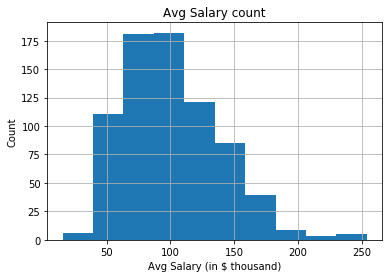

In [1874]:
#Let's look at the count of employee's with avg salary criteria
df["Avg Salary"].hist()
plt.xlabel("Avg Salary (in $ thousand)")
plt.ylabel("Count")
plt.title("Avg Salary count")

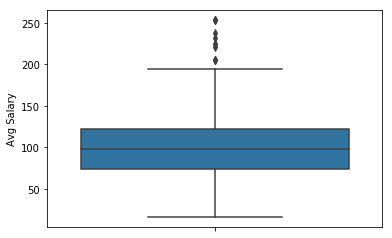

In [1875]:
sns.boxplot(y="Avg Salary", data=df)

In [1876]:
df["Avg Salary"].mean()

101.43463611859838

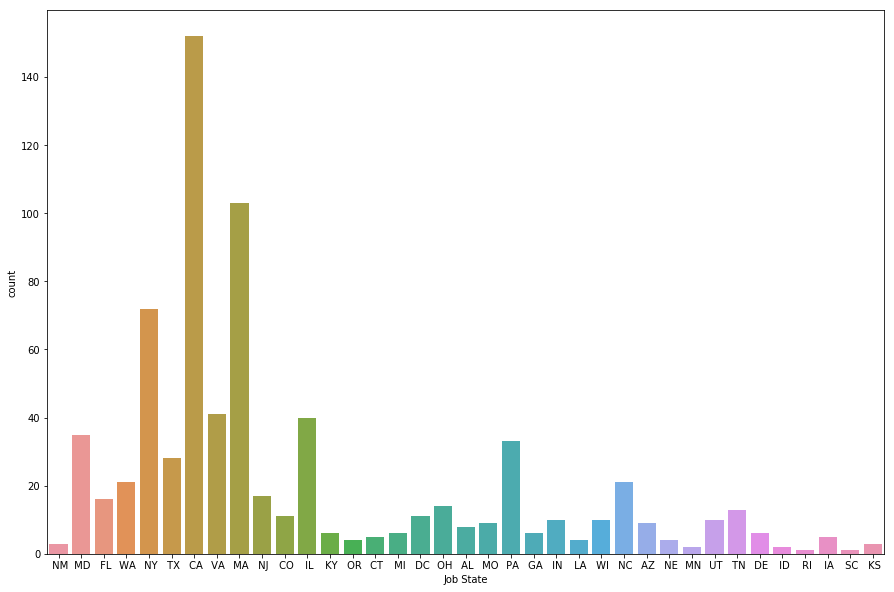

In [1877]:
plt.figure(figsize=(15,10))
sns.countplot("Job State", data=df)

In [1878]:
df["Job State"].value_counts()

/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 WA     21
 NC     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 WI     10
 IN     10
 UT     10
 AZ      9
 MO      9
 AL      8
 KY      6
 MI      6
 GA      6
 DE      6
 CT      5
 IA      5
 NE      4
 OR      4
 LA      4
 KS      3
 NM      3
 ID      2
 MN      2
 RI      1
 SC      1
Name: Job State, dtype: int64

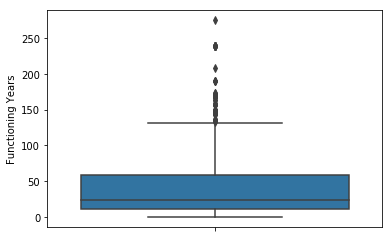

In [1879]:
sns.boxplot(y="Functioning Years", data=df)

In [1880]:
df["Functioning Years"].mean()

46.591644204851754

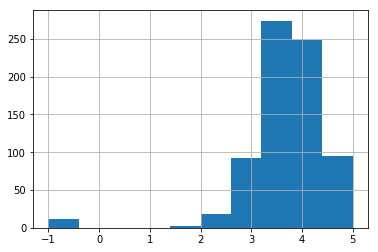

In [1881]:
df["Rating"].hist()

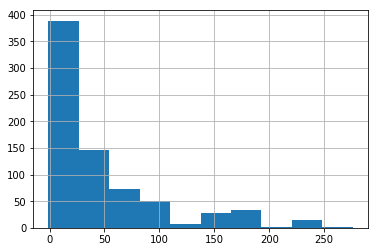

In [1882]:
df["Functioning Years"].hist()

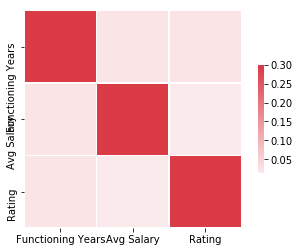

In [1883]:
# Plotting the correlation
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Functioning Years','Avg Salary','Rating']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Graph for New Job Title
Total records = 7


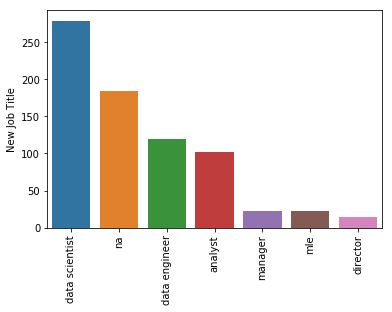

Graph for Seniority Level
Total records = 3


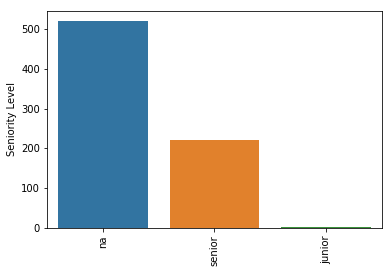

In [1884]:
# Plotting the data for 'Location' and 'Headquarters' columns
for i in ['New Job Title', 'Seniority Level']:
    unique_categories = df[i].value_counts()[:20]
    print("Graph for {}\nTotal records = {}".format(i, len(unique_categories)))
    chart = sns.barplot(x=unique_categories.index, y=unique_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Size
Total records = 8


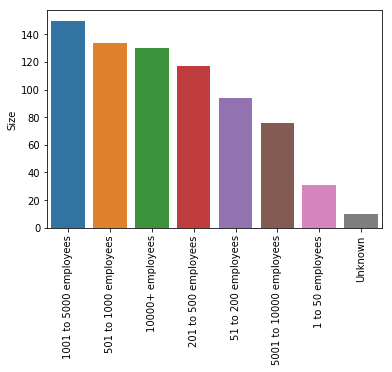

Graph for New Ownership
Total records = 10


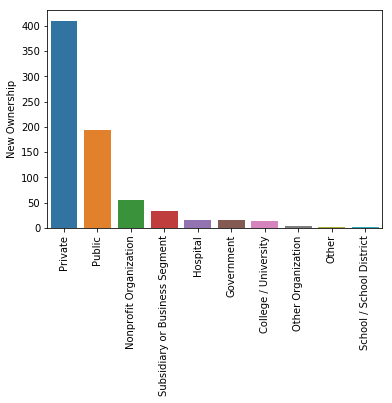

Graph for Revenue
Total records = 13


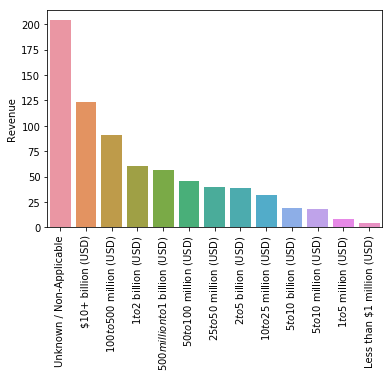

In [1885]:
# Plotting the data for 'Company Name', 'Size', 'Type of ownership', 'Revenue' columns
for i in ['Size', 'New Ownership', 'Revenue']:
    unique_categories = df[i].value_counts()[:20]
    print("Graph for {}\nTotal records = {}".format(i, len(unique_categories)))
    chart = sns.barplot(x=unique_categories.index, y=unique_categories)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [1886]:
#Let's look at salary based on job title and seniority
pd.pivot_table(df, index=["New Job Title", "Seniority Level"], values="Avg Salary")

Avg Salary
New Job Title  Seniority Level            
analyst        junior            56.500000
               na                61.155405
               senior            80.092593
data engineer  na                96.701220
               senior           124.689189
data scientist junior           106.500000
               na               107.043011
               senior           138.956522
director       na               168.607143
manager        na                84.022727
mle            na               119.133333
               senior           142.071429
na             na                78.500000
               senior           109.061404

In [1887]:
#Avg Salary based on State and title
job_state_salary=pd.pivot_table(df, index=["Job State", "New Job Title"], values="Avg Salary")

In [1888]:
job_state_salary.sort_values("Avg Salary", ascending=False)

,,Avg Salary
Job State,New Job Title,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


In [1889]:
#Avg Salary based on State
pd.pivot_table(df, index=["Job State"], values="Avg Salary")

,Avg Salary
Job State,
AL,57.937500
AZ,85.666667
CA,123.513158
CO,85.636364
CT,71.100000
DC,110.181818
DE,55.000000
FL,77.625000
GA,80.666667


In [1890]:
pd.set_option('display.max_columns', None)

In [1891]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Per hour employee,Emp Provided Salary,Min salary,Max salary,Avg Salary,python_job,r_job,spark_job,aws_job,excel_job,New Job Title,Job State,Functioning Years,Seniority Level,New Ownership
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,53,91,72.0,1,0,0,0,1,data scientist,NM,47,na,Private
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,63,112,87.5,1,0,0,0,0,data scientist,MD,36,na,Other Organization
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,80,90,85.0,1,0,1,0,1,data scientist,FL,10,na,Private
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,56,97,76.5,1,0,0,0,0,data scientist,WA,55,na,Government
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,86,143,114.5,1,0,0,0,1,data scientist,NY,22,na,Private


In [1892]:
# Top 15 Industries for Data Scientists
pd.pivot_table(df, index='New Ownership', values='Avg Salary').sort_values('Avg Salary', ascending=False)[:10]

,Avg Salary
New Ownership,
Public,111.033679
Subsidiary or Business Segment,110.573529
College / University,107.615385
Private,102.060976
Government,85.633333
Other,78.500000
School / School District,77.750000
Other Organization,77.500000
Nonprofit Organization,72.936364


In [1893]:
# Top 20 Companies that pay Data Scientists well
pd.pivot_table(df, index='Company Name', values='Avg Salary').sort_values('Avg Salary', ascending=False)[:20]

,Avg Salary
Company Name,
Gallup\n4.2,237.5
Sage Intacct\n4.7,232.5
CA-One Tech Cloud,225.0
Grand Rounds\n4.2,221.5
Credit Sesame\n4.1,205.0
The Climate Corporation\n3.2,194.0
Grainger\n3.6,179.5
Samsung Research America\n3.7,177.0
Nektar Therapeutics\n3.5,174.0


In [1894]:
# Top 10 Sectors that pay Data Scientists well
pd.pivot_table(df, index='Sector', values='Avg Salary').sort_values('Avg Salary', ascending=False)[:10]

,Avg Salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,112.098214
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


# Feature Engineering

In [1895]:
#Let's see what dataframe we have so far
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Per hour employee,Emp Provided Salary,Min salary,Max salary,Avg Salary,python_job,r_job,spark_job,aws_job,excel_job,New Job Title,Job State,Functioning Years,Seniority Level,New Ownership
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,53,91,72.0,1,0,0,0,1,data scientist,NM,47,na,Private
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,63,112,87.5,1,0,0,0,0,data scientist,MD,36,na,Other Organization
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,80,90,85.0,1,0,1,0,1,data scientist,FL,10,na,Private
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,56,97,76.5,1,0,0,0,0,data scientist,WA,55,na,Government
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,86,143,114.5,1,0,0,0,1,data scientist,NY,22,na,Private


In [1896]:
# Taking top 10 States and replacing others by 'Others'
job_state_list = [' CA', ' MA', ' NY', ' VA', ' IL', ' MD', ' PA', ' TX', ' NC', ' WA']


def job_state_classifier(text):
  if text not in job_state_list:
    return 'Others'
  else:
    return text


df['Job State'] = df['Job State'].apply(job_state_classifier)

In [1897]:
df['Job State'].value_counts()

Others    196
 CA       152
 MA       103
 NY        72
 VA        41
 IL        40
 MD        35
 PA        33
 TX        28
 NC        21
 WA        21
Name: Job State, dtype: int64

In [1898]:
# Taking top 10 Industries and replacing others by 'Others'
industry_list = ['Biotech & Pharmaceuticals', 'Insurance Carriers', 'Computer Hardware & Software', 'IT Services', 'Health Care Services & Hospitals', 
                'Enterprise Software & Network Solutions', 'Consulting', 'Internet', 'Advertising & Marketing', 'Aerospace & Defense']

def industry_classifier(row):
    if row not in industry_list:
        return 'Others'
    else:
        return row

df['Industry'] = df['Industry'].apply(industry_classifier)

In [1899]:
df["Industry"].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Others', 'Advertising & Marketing', 'Consulting', 'Internet',
       'Biotech & Pharmaceuticals',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'IT Services', 'Computer Hardware & Software'], dtype=object)

In [1900]:
# Choosing relevant columns
df_relevant = df.copy(deep=True)
df_relevant = df_relevant[['Avg Salary', 'Rating', 'Functioning Years', 'Size', 'New Ownership', 'Industry', 'Revenue', 'Competitors',
               'New Job Title', 'Seniority Level', 'Job State', 'python_job', 'spark_job', 'aws_job', 'r_job']]

# NOMINAL FEATURES

In [1901]:
#Handling Nominal Features: New Ownership, Industry, Job State and New Job title
df_relevant=pd.get_dummies(columns=["Industry"], data=df_relevant, drop_first=True)

In [1902]:
df_relevant=pd.get_dummies(columns=["New Ownership"], data=df_relevant, drop_first=True)

In [1903]:
df_relevant=pd.get_dummies(columns=["Job State"], data=df_relevant, drop_first=True)

In [1904]:
df_relevant=pd.get_dummies(columns=["New Job Title"], data=df_relevant, drop_first=True)

In [1905]:
df_relevant.head()

,Avg Salary,Rating,Functioning Years,Size,Revenue,Competitors,Seniority Level,python_job,spark_job,aws_job,r_job,Industry_Aerospace & Defense,Industry_Biotech & Pharmaceuticals,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Enterprise Software & Network Solutions,Industry_Health Care Services & Hospitals,Industry_IT Services,Industry_Insurance Carriers,Industry_Internet,Industry_Others,New Ownership_Government,New Ownership_Hospital,New Ownership_Nonprofit Organization,New Ownership_Other,New Ownership_Other Organization,New Ownership_Private,New Ownership_Public,New Ownership_School / School District,New Ownership_Subsidiary or Business Segment,Job State_ IL,Job State_ MA,Job State_ MD,Job State_ NC,Job State_ NY,Job State_ PA,Job State_ TX,Job State_ VA,Job State_ WA,Job State_Others,New Job Title_data engineer,New Job Title_data scientist,New Job Title_director,New Job Title_manager,New Job Title_mle,New Job Title_na
0,72.0,3.8,47,501 to 1000 employees,$50 to $100 million (USD),0,na,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,87.5,3.4,36,10000+ employees,$2 to $5 billion (USD),0,na,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,85.0,4.8,10,501 to 1000 employees,$100 to $500 million (USD),0,na,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,76.5,3.8,55,1001 to 5000 employees,$500 million to $1 billion (USD),3,na,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,114.5,2.9,22,51 to 200 employees,Unknown / Non-Applicable,3,na,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# ORDINAL FEATURES

In [1906]:
#Let's handle the ordinal features: Size, Revenue, Seniority Level
size_mapping = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df_relevant['Size'] = df_relevant['Size'].map(size_mapping)

In [1907]:
revenue_mapping = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11, '$10+ billion (USD)':12}

df_relevant['Revenue'] = df_relevant['Revenue'].map(revenue_mapping)


In [1908]:
seniority_mapping = {'na': 0, 'jr': 1, 'senior': 2}

df_relevant['Seniority Level'] = df_relevant['Seniority Level'].map(seniority_mapping)


In [1909]:
df_relevant.head()

,Avg Salary,Rating,Functioning Years,Size,Revenue,Competitors,Seniority Level,python_job,spark_job,aws_job,r_job,Industry_Aerospace & Defense,Industry_Biotech & Pharmaceuticals,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Enterprise Software & Network Solutions,Industry_Health Care Services & Hospitals,Industry_IT Services,Industry_Insurance Carriers,Industry_Internet,Industry_Others,New Ownership_Government,New Ownership_Hospital,New Ownership_Nonprofit Organization,New Ownership_Other,New Ownership_Other Organization,New Ownership_Private,New Ownership_Public,New Ownership_School / School District,New Ownership_Subsidiary or Business Segment,Job State_ IL,Job State_ MA,Job State_ MD,Job State_ NC,Job State_ NY,Job State_ PA,Job State_ TX,Job State_ VA,Job State_ WA,Job State_Others,New Job Title_data engineer,New Job Title_data scientist,New Job Title_director,New Job Title_manager,New Job Title_mle,New Job Title_na
0,72.0,3.8,47,4,6,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,87.5,3.4,36,7,10,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,85.0,4.8,10,4,7,0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,76.5,3.8,55,5,8,3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,114.5,2.9,22,2,0,3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [1910]:
df_relevant.isnull().any()

Avg Salary                                          False
Rating                                              False
Functioning Years                                   False
Size                                                False
Revenue                                             False
Competitors                                         False
Seniority Level                                      True
python_job                                          False
spark_job                                           False
aws_job                                             False
r_job                                               False
Industry_Aerospace & Defense                        False
Industry_Biotech & Pharmaceuticals                  False
Industry_Computer Hardware & Software               False
Industry_Consulting                                 False
Industry_Enterprise Software & Network Solutions    False
Industry_Health Care Services & Hospitals           False
Industry_IT Se

In [1911]:
df_relevant.replace([np.inf, -np.inf], np.nan, inplace=True)

In [1912]:
df_relevant.dropna(inplace=True)

In [1913]:
#Let's separate dependent and independent variables
y=df_relevant['Avg Salary']
X= df_relevant.drop("Avg Salary", axis=1)

In [1914]:
X.head()

,Rating,Functioning Years,Size,Revenue,Competitors,Seniority Level,python_job,spark_job,aws_job,r_job,Industry_Aerospace & Defense,Industry_Biotech & Pharmaceuticals,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Enterprise Software & Network Solutions,Industry_Health Care Services & Hospitals,Industry_IT Services,Industry_Insurance Carriers,Industry_Internet,Industry_Others,New Ownership_Government,New Ownership_Hospital,New Ownership_Nonprofit Organization,New Ownership_Other,New Ownership_Other Organization,New Ownership_Private,New Ownership_Public,New Ownership_School / School District,New Ownership_Subsidiary or Business Segment,Job State_ IL,Job State_ MA,Job State_ MD,Job State_ NC,Job State_ NY,Job State_ PA,Job State_ TX,Job State_ VA,Job State_ WA,Job State_Others,New Job Title_data engineer,New Job Title_data scientist,New Job Title_director,New Job Title_manager,New Job Title_mle,New Job Title_na
0,3.8,47,4,6,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,3.4,36,7,10,0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.8,10,4,7,0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,3.8,55,5,8,3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2.9,22,2,0,3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# FEATURE SCALING

In [1915]:
# Splitting the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [1916]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
scale_columns=['Rating', 'Competitors','Functioning Years', 'Revenue', 'Size']
X_train[scale_columns] = mn.fit_transform(X_train[scale_columns])
X_test[scale_columns] = mn.transform(X_test[scale_columns])

/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [1917]:
from sklearn.linear_model import LinearRegression


In [1918]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.predict(X_train)
print("Accuracy of the Linear Regression Model on Training set is : {}% and on Test set is {}%".format(regressor.score(X_train, y_train)*100, regressor.score(X_test, y_test)*100))
      
      
      

Accuracy of the Linear Regression Model on Training set is : 57.574725357141745% and on Test set is 54.559896892689764%


In [1919]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(base_estimator=decision_model, n_estimators=250, learning_rate=1, random_state=42)

In [1920]:
# Fitting the dataset to the model
adb.fit(X_train, y_train)
print("Accuracy of the AdaBoost Regression Model on Training set is : {}% and on Test set is {}%".format(adb.score(X_train, y_train)*100, adb.score(X_test, y_test)*100))




Accuracy of the AdaBoost Regression Model on Training set is : 95.9135290564871% and on Test set is 73.97198277171346%


In [1921]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)


/Users/sanyuktabaluni/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [1922]:
print("Accuracy of the Random Forest Regression Model on Training set is : {}% and on Test set is {}%".format(regr.score(X_train, y_train)*100, regr.score(X_test, y_test)*100))




Accuracy of the Random Forest Regression Model on Training set is : 89.53533929850643% and on Test set is 63.70434973576795%
